In [ ]:
import torch
import torchvision
from torchvision import transforms
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the Faster RCNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval() # Set the model to evaluation mode

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 96.5MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
# Function to load the image
def load_image(image):
  image = Image.open(image)
  transform = transforms.Compose([
      transforms.ToTensor()
  ])
  return transform(image).unsqueeze(0)  # Add the batch dimension

In [ ]:
load_image('dog.jpg')

tensor([[[[0.6510, 0.6510, 0.6549,  ..., 0.6392, 0.6353, 0.6314],
          [0.6510, 0.6510, 0.6549,  ..., 0.6392, 0.6392, 0.6353],
          [0.6510, 0.6549, 0.6549,  ..., 0.6431, 0.6431, 0.6392],
          ...,
          [0.3961, 0.3922, 0.3961,  ..., 0.4745, 0.4667, 0.4627],
          [0.3922, 0.3882, 0.3843,  ..., 0.4706, 0.4706, 0.4706],
          [0.3882, 0.3882, 0.3882,  ..., 0.4667, 0.4706, 0.4745]],

         [[0.7373, 0.7373, 0.7412,  ..., 0.7216, 0.7176, 0.7137],
          [0.7373, 0.7373, 0.7412,  ..., 0.7216, 0.7216, 0.7176],
          [0.7373, 0.7412, 0.7412,  ..., 0.7255, 0.7255, 0.7216],
          ...,
          [0.4824, 0.4784, 0.4824,  ..., 0.4863, 0.4784, 0.4745],
          [0.4784, 0.4745, 0.4706,  ..., 0.5020, 0.4902, 0.4902],
          [0.4745, 0.4745, 0.4745,  ..., 0.5020, 0.5020, 0.4941]],

         [[0.4824, 0.4824, 0.4863,  ..., 0.4588, 0.4549, 0.4510],
          [0.4824, 0.4824, 0.4863,  ..., 0.4588, 0.4588, 0.4549],
          [0.4824, 0.4863, 0.4863,  ..., 0

In [ ]:
# Define function for prediction
def predict(image):
  image_tensor = load_image(image)
  with torch.no_grad():
    prediction = model(image_tensor)

  return prediction

In [ ]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter',
    'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra',
    'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard',
    'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon',
    'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet',
    'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
    'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]

In [ ]:
# Visualize the predictions
def visualize_predictions(image, prediction):
  image = plt.imread(image)
  plt.imshow(image)

  boxes = prediction[0]['boxes']
  labels = prediction[0]['labels']
  scores = prediction[0]['scores']

  keep = scores > 0.5
  boxes = boxes[keep]
  labels = labels[keep]

  # visualize the box
  for box, label in zip(boxes, labels):
    box = box.cpu().numpy()
    x1, y1, x2, y2 = box
    plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1,
                                      lw=2, edgecolor='r', fill=False))
    plt.text(x1, y1-5,
             "Class:"+COCO_INSTANCE_CATEGORY_NAMES[label.item()-1],
             color='r', fontsize=10)

  plt.show()

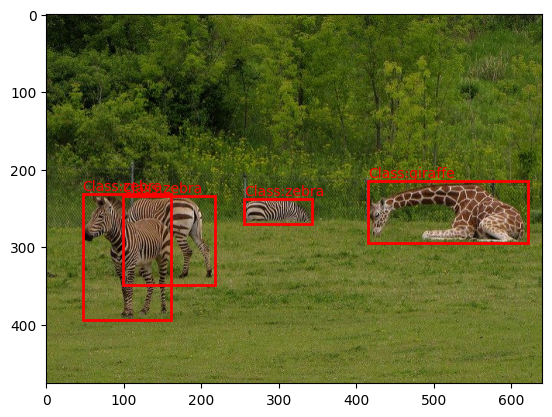

In [ ]:
prediction = predict('jungle.jpg')

visualize_predictions('jungle.jpg', prediction)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:01<00:00, 139MB/s]


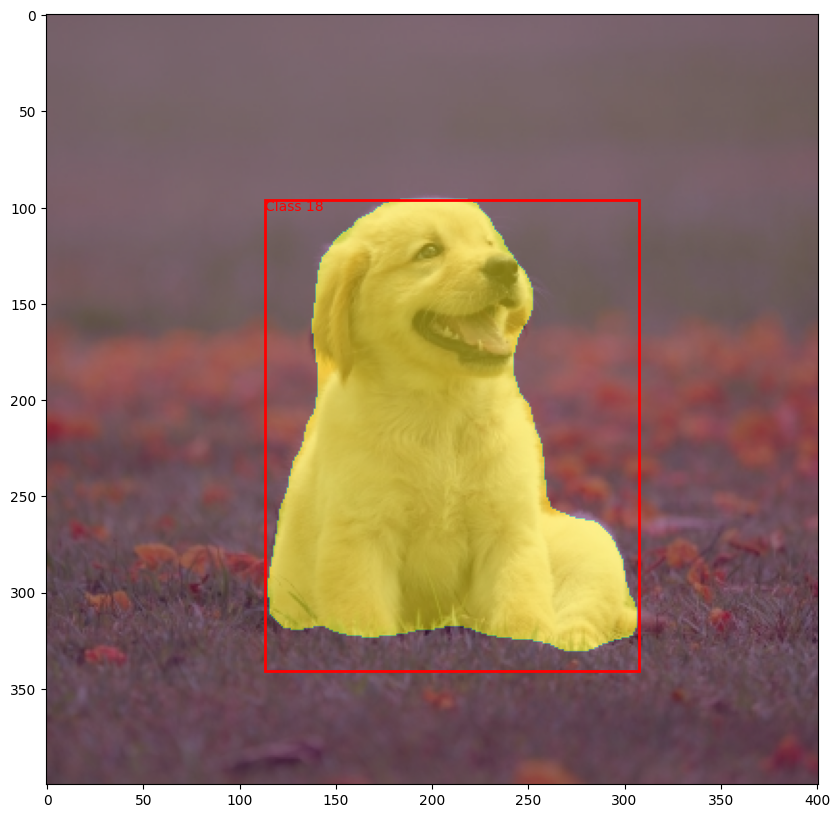

In [ ]:
import torch
import torchvision
from torchvision import transforms
from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the pre-trained Mask R-CNN model
model = maskrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Load and transform an input image
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([
        transforms.ToTensor(),
    ])
    return transform(image).unsqueeze(0)  # Add a batch dimension

# Make predictions
def predict(image_path):
    image_tensor = load_image(image_path)

    with torch.no_grad():  # Disable gradient calculation
        prediction = model(image_tensor)

    return prediction

# Visualize the predictions (bounding boxes, masks, and labels)
def visualize_predictions(image_path, prediction):
    image = Image.open(image_path).convert("RGB")
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

    # Get the bounding boxes, masks, labels, and scores from the prediction
    boxes = prediction[0]['boxes']
    masks = prediction[0]['masks']
    labels = prediction[0]['labels']
    scores = prediction[0]['scores']

    # Only consider predictions with a score above a threshold (e.g., 0.5)
    threshold = 0.5
    keep = scores > threshold

    boxes = boxes[keep]
    masks = masks[keep]
    labels = labels[keep]

    # Visualize each box and mask
    for box, mask, label in zip(boxes, masks, labels):
        box = box.cpu().numpy()
        mask = mask[0].cpu().numpy()  # Convert to NumPy array
        x1, y1, x2, y2 = box
        plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor="r", facecolor="none"))
        plt.text(x1, y1, f"Class {label.item()}", color="red", fontsize=10, verticalalignment="top", horizontalalignment="left")

        # Overlay the mask on the image
        mask = mask > 0.5  # Threshold the mask
        plt.imshow(mask, alpha=0.5)  # Alpha is used to blend the mask with the image

    plt.show()

# Run the model on an image
image_path = 'dog.jpg'  # Replace with your image path
prediction = predict(image_path)

# Visualize the result
visualize_predictions(image_path, prediction)


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-12-28 Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detected objects: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

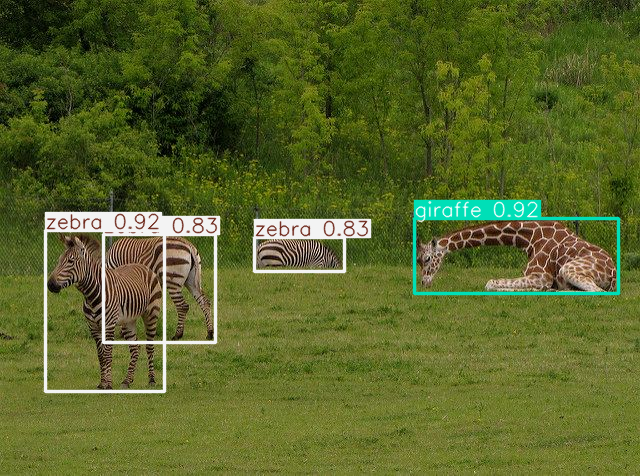

Saved 1 image to runs/detect/exp2


In [ ]:
import torch
import matplotlib.pyplot as plt
import cv2
from PIL import Image

# Load the pre-trained YOLOv5 model (v5.0)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # 'yolov5s' is the small version

# Function to load and preprocess image
def load_image(image_path):
    # Open image using OpenCV (use cv2.imread or PIL if needed)
    image = Image.open(image_path)
    return image

# Perform inference on the image
def predict(image_path):
    # Load image
    image = load_image(image_path)

    # Run inference (returns predictions in a dictionary format)
    results = model(image)

    # Print results
    print(f"Detected objects: {results.names}")
    print(f"Prediction scores: {results.xywh[0][:, -2]}")  # Confidence scores

    # Visualize the results
    results.show()  # This will display the image with bounding boxes

    # Save the image with the detections
    results.save()  # This saves the resulting image with bounding boxes to 'runs/detect/exp/'

# Use the function to perform object detection on an image
image_path = 'jungle.jpg'  # Replace with your image file path
predict(image_path)
